# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 05.11.2020

Мягкий дедлайн: 01:59MSK 18.11.2019

Жесткий дедлайн: 01:59MSK 22.11.2019

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/21899 нужно отправить файл hw5code.py с реализованными функциями и классами. 
Id успешных посылок: 41476162 - A
                     41891910 - B

Username — ваша фамилия и имя на латинице именно в таком порядке pr.leha -ник в контесте. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже: 

__Оценка:__10.5-11(с бонусом)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

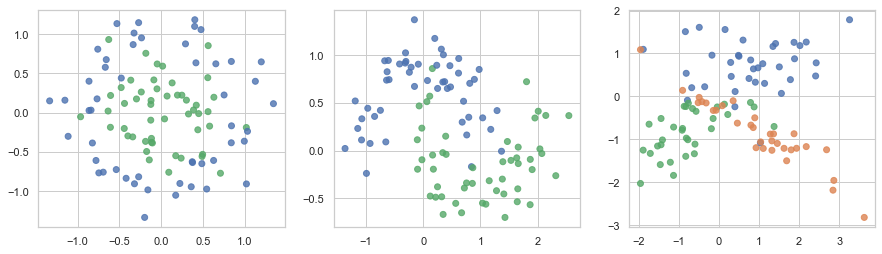

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

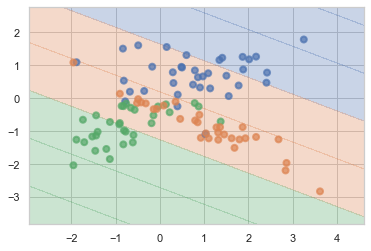

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [9]:
from sklearn.tree import DecisionTreeRegressor

0.8 for test
1.0 for train


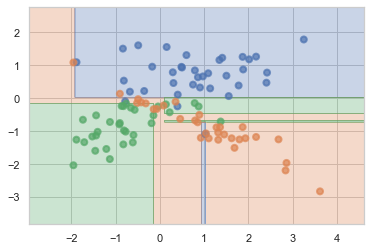

In [1176]:
from sklearn.metrics import accuracy_score

X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
    
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)
    
    
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)
print(accuracy_score(y_test, predicted), "for test")
print(accuracy_score(y_train, predicted_train), "for train")
plot_surface(clf, X, y)

0.7333333333333333
1.0 for train


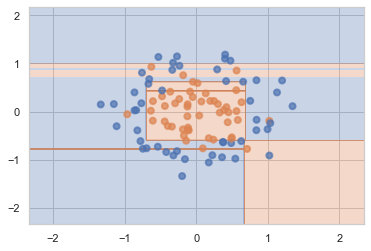

In [18]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
    
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)
    
    
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)
    
print(accuracy_score(y_test, predicted))
print(accuracy_score(y_train, predicted_train), "for train")
plot_surface(clf, X, y)

0.8666666666666667
1.0 for train
0.0 MSE


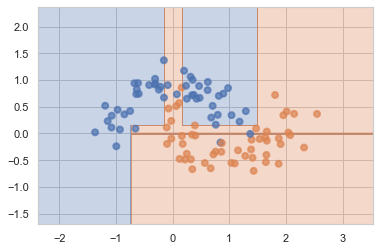

In [38]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
    
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)
    
    
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)
    
print(accuracy_score(y_test, predicted))
print(accuracy_score(y_train, predicted_train), "for train")
print(mean_squared_error(y_train, predicted_train), "MSE")
plot_surface(clf, X, y)

__Ответ:__

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

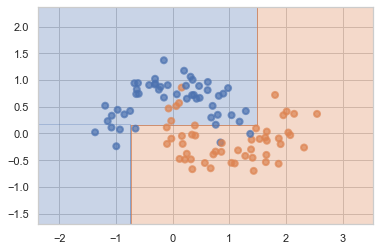

In [33]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
    
clf = DecisionTreeRegressor(random_state=42, max_depth = 2)
clf.fit(X_train, y_train)
    
    
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)
    
#print(accuracy_score(y_test, predicted))
#print(accuracy_score(y_train, predicted_train), "for train")
plot_surface(clf, X, y)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, predicted_train)

0.07444534632034631

Ошибка стала больше => алгоритм не так переобучился, в отличие от пред примера где MSE = 0

0.12413712413712413


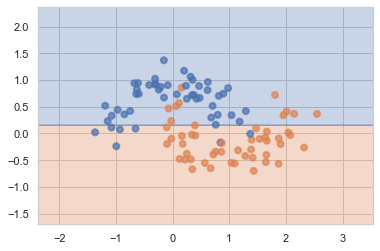

In [39]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
    
clf = DecisionTreeRegressor(random_state=42, min_samples_leaf=20)
clf.fit(X_train, y_train)
    
    
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)
    
#print(accuracy_score(y_test, predicted))
#print(accuracy_score(y_train, predicted_train), "for train")
print(mean_squared_error(y_train, predicted_train))
plot_surface(clf, X, y)

Алгоритм не сильно переобучился, ибо стоит ограничение по кол-ву листьев.

0.030476190476190483


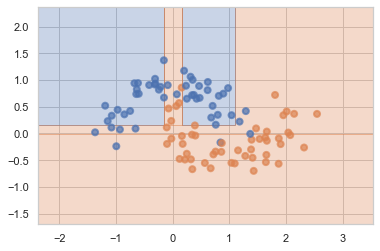

In [42]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)
    
clf = DecisionTreeRegressor(random_state=42, min_samples_leaf=5)
clf.fit(X_train, y_train)
    
    
predicted = clf.predict(X_test)
predicted_train = clf.predict(X_train)
    
#print(accuracy_score(y_test, predicted))
#print(accuracy_score(y_train, predicted_train), "for train")
print(mean_squared_error(y_train, predicted_train))
plot_surface(clf, X, y)

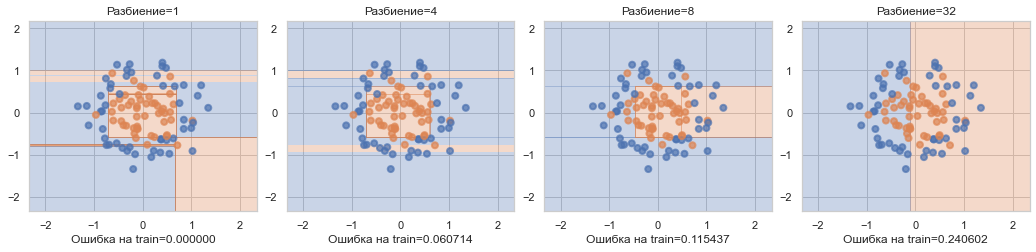

In [686]:
min_samples_leaf =  [1, 4, 8, 32]
plt.figure(figsize=(15, 4))
i = 0
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

for el in min_samples_leaf:
    
    clf = DecisionTreeRegressor(random_state=42, min_samples_leaf=el)
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, predicted_train)
    
    plt.subplot(1, 4, i + 1)
    plot_surface(clf, X, y)
    plt.title('Разбиение=%d'%el)
    plt.xlabel('Ошибка на train=%f'%mse_train)
    i+=1

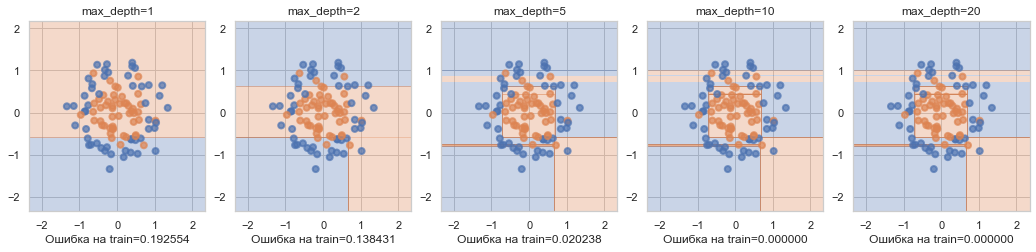

In [687]:
max_depth =  [1, 2, 5, 10, 20]
plt.figure(figsize=(15, 4))
i = 0
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

for el in max_depth:
    
    clf = DecisionTreeRegressor(random_state=42, max_depth=el)
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, predicted_train)
    
    plt.subplot(1, 5, i + 1)
    plot_surface(clf, X, y)
    plt.title('max_depth=%d'%el)
    plt.xlabel('Ошибка на train=%f'%mse_train)
    i+=1

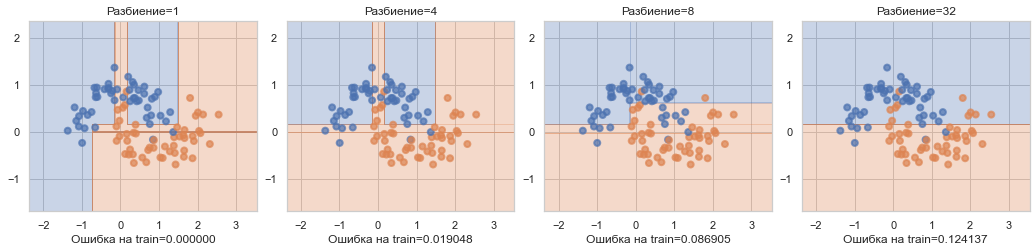

In [688]:
min_samples_leaf =  [1, 4, 8, 32]
plt.figure(figsize=(15, 4))
i = 0
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

for el in min_samples_leaf:
    
    clf = DecisionTreeRegressor(random_state=42, min_samples_leaf=el)
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, predicted_train)
    
    plt.subplot(1, 4, i + 1)
    plot_surface(clf, X, y)
    plt.title('Разбиение=%d'%el)
    plt.xlabel('Ошибка на train=%f'%mse_train)
    i+=1

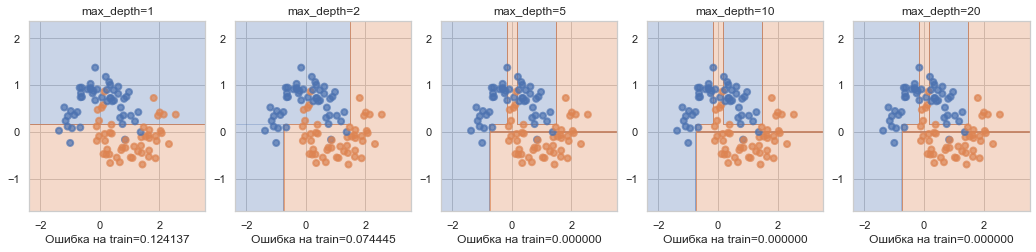

In [689]:
max_depth =  [1, 2, 5, 10, 20]
plt.figure(figsize=(15, 4))
i = 0
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

for el in max_depth:
    
    clf = DecisionTreeRegressor(random_state=42, max_depth=el)
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, predicted_train)
    
    plt.subplot(1, 5, i + 1)
    plot_surface(clf, X, y)
    plt.title('max_depth=%d'%el)
    plt.xlabel('Ошибка на train=%f'%mse_train)
    i+=1

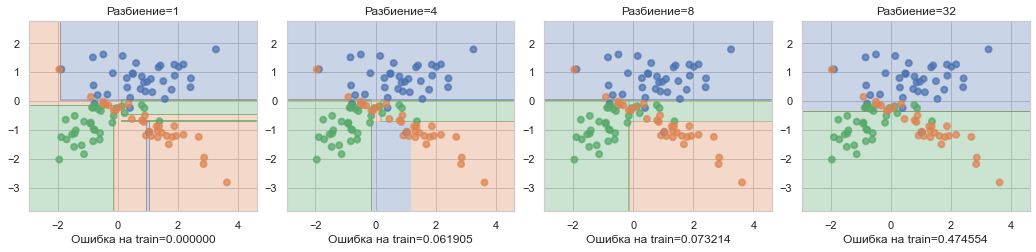

In [684]:
min_samples_leaf =  [1, 4, 8, 32]
plt.figure(figsize=(15, 4))
i = 0
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

for el in min_samples_leaf:
    
    clf = DecisionTreeRegressor(random_state=42, min_samples_leaf=el)
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, predicted_train)
    
    plt.subplot(1, 4, i + 1)
    plot_surface(clf, X, y)
    plt.title('Разбиение=%d'%el)
    plt.xlabel('Ошибка на train=%f'%mse_train)
    i+=1

Чем меньше листьев, тем более вероятно переобучение модели

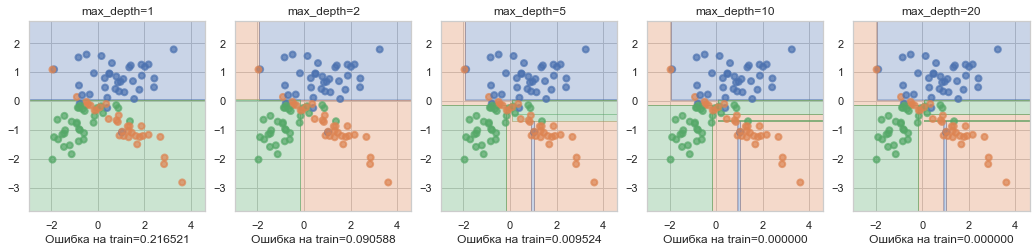

In [685]:
max_depth =  [1, 2, 5, 10, 20]
plt.figure(figsize=(15, 4))
i = 0
X, y = datasets[2]
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42)

for el in max_depth:
    
    clf = DecisionTreeRegressor(random_state=42, max_depth=el)
    clf.fit(X_train, y_train)
    
    predicted = clf.predict(X_test)
    predicted_train = clf.predict(X_train)
    mse_train = mean_squared_error(y_train, predicted_train)
    
    plt.subplot(1, 5, i + 1)
    plot_surface(clf, X, y)
    plt.title('max_depth=%d'%el)
    plt.xlabel('Ошибка на train=%f'%mse_train)
    i+=1

Тут видно, что чем больше глубина дерева, тем быстрее происходит его переобучение

__Ответ:__

Вывод: на различных датасетах с различными параметрами модель ведет себя одинаково. Чем больше глубина, тем быстрее оно переобучается. Чем меньше листьев, тем быстрее переобучается. Соотвественно наблюдается обратная зависимость ошибки на трайне и глубиной дерева и прямая завивимость между ошибкой на трейне и количеством листьев.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

# Тут просто дебажу

In [1324]:
def find_best_split1(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    
    
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)


    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)"""
    
    length = len(feature_vector)
    feature_vector1 = np.sort(np.unique(feature_vector))
    thresholds = (np.append(feature_vector1[1:], 0) + feature_vector1)/2
    p = 0
    if (len(thresholds) == 1):
        p += 1 # ничего не делаю - просто пойти дальше
    else:
        thresholds = thresholds[:len(feature_vector1)-1]

    maxi = -100000
    num = 0
    ginis = np.array([])
    
    for i in range(len(thresholds)): # надо убрать цикл
        
        ind_left = np.where((feature_vector < thresholds[i])  == True)[0]
        ind_right = np.where((feature_vector >= thresholds[i])  == True)[0]

        p1_left = sum(target_vector[ind_left])/len(ind_left)
        #print(sum(target_vector[ind_left]))
        #p1_left = (target_vector[ind_left])
        p0_left = 1-p1_left
        p1_right = sum(target_vector[ind_right])/len(ind_right)
        #p1_right = (target_vector[ind_right].values == 1).mean()
        p0_right = 1-p1_right
        q = -len(ind_left)*(1-p1_left**2-p0_left**2)-len(ind_right)*(1-p1_right**2-p0_right**2)
        if (q/length > maxi):
            maxi = q/length
            num = i
        ginis = np.append(ginis, q/length)
            
    threshold_best = thresholds[num]
    gini_best = maxi
    return thresholds, ginis,threshold_best ,gini_best



In [1323]:
def find_best_split(feature_vector, target_vector , min_leaf):
    
    objects = np.array(list(zip(feature_vector, target_vector)))
    
    objects = objects[objects[:, 0].argsort()] # отсорченный массив двух пар по значениям признака
    features = objects[:, 0]
    values = objects[:, 1]
    
    
    N = len(features)
    total = sum(values)
    left = np.append(np.zeros(1), features)

    right = np.append(features, np.zeros(1))
    thresholds = ((left+right)/2)[1:-1]
    
    one_counts = np.cumsum(values[:-1])
    l_lens = np.cumsum(np.ones(N-1))
    r_lens = N - l_lens
    left_p1 = one_counts/l_lens
    right_p1 = (total - one_counts)/r_lens
    
    gini = - ((1 - left_p1 ** 2 - (1-left_p1)**2) * l_lens + (1 - right_p1 ** 2 - (1-right_p1) ** 2) * r_lens)/N
    
    condition = (left < right)[1:-1]
    
    condition_leaf = np.array([False]*(min_leaf-1)+[True]*(N+1-2*min_leaf)+[False]*(min_leaf-1)) #тут условие - что отступаем от крае на min_leaf-1,  иначе будет разбиение с количеством листьев < min_leaf
    
    thresholds = thresholds[condition & condition_leaf]
    gini = gini[condition & condition_leaf]
    #print(gini)
    #print(thresholds)
    if (len(gini) == 0):
        return (), (), -1, -1
    
    maxi = np.argmax(gini)
    
    return thresholds, gini, thresholds[maxi], gini[maxi]

In [473]:
R = len(y)
objects = np.array(list(zip(df['STG'], y)))
    
objects = objects[objects[:, 0].argsort()] # отсорченный массив двух пар по значениям признака
features = objects[:, 0]
values = objects[:, 1]

l_features =  np.concatenate((np.zeros(1), features))
r_features = np.concatenate((features, np.zeros(1)))


In [477]:
one_counts = np.cumsum(values[:-1])
left_sizes = np.cumsum(np.ones(R-1))
right_sizes = R - left_sizes

In [518]:
len(one_counts)

257

In [481]:
total_ones = np.sum(values)

In [482]:
left_p1 = one_counts/left_sizes
right_p1 = (total_ones - one_counts)/right_sizes


In [490]:
HL = 1 - left_p1 ** 2 - (1-left_p1)**2
HR = 1 - right_p1 ** 2 - (1-right_p1) ** 2
ginis = - (HL * left_sizes + HR * right_sizes)/R

In [494]:
cond1 = (l_features < r_features)[1:-1]

In [1335]:
thres1, ginis1, a, b = find_best_split(df['STG'],y, 50) 

In [1336]:
thres1

array([0.185, 0.195, 0.215, 0.235, 0.245, 0.255, 0.265, 0.275, 0.285,
       0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355, 0.365, 0.375,
       0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445, 0.455, 0.465,
       0.475, 0.485, 0.495, 0.505, 0.515, 0.53 , 0.545, 0.555, 0.57 ])

In [672]:
ginis1

array([-0.48534399, -0.48396413, -0.48191723, -0.47959065, -0.47095948,
       -0.47292564, -0.47442147, -0.47785138, -0.4776358 , -0.47888802,
       -0.48000479, -0.47843025, -0.47951378, -0.48309858, -0.48363484,
       -0.48459691, -0.48488703, -0.48503935, -0.48151274, -0.4789217 ,
       -0.47223199, -0.46842923, -0.46988272, -0.47619169, -0.47758883,
       -0.47998814, -0.47881933, -0.47953614, -0.47617403, -0.47488107,
       -0.46827572, -0.46197818, -0.45451169, -0.45810691, -0.46226881,
       -0.46409609, -0.46778904, -0.47323273, -0.47552839, -0.47888371,
       -0.47962598, -0.48161094, -0.48244069, -0.4831884 , -0.48291833,
       -0.48063112, -0.4801726 , -0.47576941, -0.47673077, -0.46597518,
       -0.4631503 , -0.45973971, -0.45397708, -0.45469893, -0.45784574,
       -0.46242236, -0.46141398, -0.45690883, -0.45847873, -0.46157441,
       -0.46461098, -0.46119206, -0.46271382, -0.46422305, -0.46720456,
       -0.47302388, -0.47444961, -0.47586399, -0.47726713, -0.47

In [674]:
thres2, ginis2, a, b = find_best_slit_3(df['STG'],y) 

In [675]:
thres2

array([0.01 , 0.03 , 0.045, 0.055, 0.07 , 0.085, 0.095, 0.11 , 0.125,
       0.135, 0.145, 0.16 , 0.175, 0.185, 0.195, 0.215, 0.235, 0.245,
       0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335,
       0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425,
       0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515,
       0.53 , 0.545, 0.555, 0.57 , 0.585, 0.595, 0.605, 0.615, 0.63 ,
       0.65 , 0.67 , 0.685, 0.695, 0.705, 0.715, 0.725, 0.74 , 0.755,
       0.765, 0.775, 0.785, 0.795, 0.815, 0.84 , 0.865, 0.885, 0.895,
       0.905, 0.95 ])

In [676]:
ginis2

array([-0.48534399, -0.48396413, -0.48191723, -0.47959065, -0.47095948,
       -0.47292564, -0.47442147, -0.47785138, -0.4776358 , -0.47888802,
       -0.48000479, -0.47843025, -0.47951378, -0.48309858, -0.48363484,
       -0.48459691, -0.48488703, -0.48503935, -0.48151274, -0.4789217 ,
       -0.47223199, -0.46842923, -0.46988272, -0.47619169, -0.47758883,
       -0.47998814, -0.47881933, -0.47953614, -0.47617403, -0.47488107,
       -0.46827572, -0.46197818, -0.45451169, -0.45810691, -0.46226881,
       -0.46409609, -0.46778904, -0.47323273, -0.47552839, -0.47888371,
       -0.47962598, -0.48161094, -0.48244069, -0.4831884 , -0.48291833,
       -0.48063112, -0.4801726 , -0.47576941, -0.47673077, -0.46597518,
       -0.4631503 , -0.45973971, -0.45397708, -0.45469893, -0.45784574,
       -0.46242236, -0.46141398, -0.45690883, -0.45847873, -0.46157441,
       -0.46461098, -0.46119206, -0.46271382, -0.46422305, -0.46720456,
       -0.47302388, -0.47444961, -0.47586399, -0.47726713, -0.47

In [738]:
thres, ginis, q, num = find_best_split(df['STR'], y) 

10


In [739]:
thres

array([0.01 , 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085, 0.095,
       0.105, 0.115, 0.125, 0.14 , 0.165, 0.185, 0.195, 0.21 , 0.23 ,
       0.245, 0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325,
       0.335, 0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.42 ,
       0.435, 0.445, 0.455, 0.47 , 0.485, 0.495, 0.505, 0.515, 0.525,
       0.535, 0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615,
       0.625, 0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705,
       0.715, 0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795,
       0.805, 0.815, 0.825, 0.84 , 0.855, 0.865, 0.875, 0.885, 0.9  ,
       0.93 ])

In [512]:
thres, ginis, q, num = find_best_split(df['C'], y) 

In [513]:
thres

array([0.5])

In [612]:
ginis

array([-0.4827919 , -0.48544903, -0.48511136, -0.48544692, -0.48402395,
       -0.48118482, -0.48257015, -0.4796727 , -0.47798098, -0.47035699,
       -0.47264203, -0.46875425, -0.47293682, -0.47623787, -0.47454821,
       -0.47826405, -0.47547527, -0.47657126, -0.47772838, -0.47878794,
       -0.48142605, -0.48124031, -0.48243311, -0.4839817 , -0.48436766,
       -0.48255478, -0.47843714, -0.47675681, -0.47386695, -0.46936609,
       -0.46733829, -0.46950961, -0.47464907, -0.47291789, -0.46905481,
       -0.4697837 , -0.47091448, -0.47200046, -0.47304214, -0.47499433,
       -0.47590564, -0.47760044, -0.47476235, -0.47294912, -0.47710685,
       -0.47453598, -0.4754522 , -0.47549489, -0.47592845, -0.47307159,
       -0.47448134, -0.47489936, -0.4747712 , -0.47657123, -0.47552839,
       -0.47588597, -0.47677151, -0.47623017, -0.47794468, -0.47950416,
       -0.48090278, -0.48213358, -0.48144233, -0.48195014, -0.48242894,
       -0.47809627, -0.47898466, -0.48003783, -0.48293271, -0.48

In [533]:
ginis1 == ginis

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [503]:
print(len(thres), len(ginis))

74 74


In [354]:
np.sort(np.unique(df['STG']))

array([0.  , 0.02, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1 , 0.12, 0.13, 0.14,
       0.15, 0.17, 0.18, 0.19, 0.2 , 0.23, 0.24, 0.25, 0.26, 0.27, 0.28,
       0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39,
       0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ,
       0.51, 0.52, 0.54, 0.55, 0.56, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.64,
       0.66, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.75, 0.76, 0.77, 0.78,
       0.79, 0.8 , 0.83, 0.85, 0.88, 0.89, 0.9 , 0.91, 0.99])

In [347]:
thres

array([0.01 , 0.03 , 0.045, 0.055, 0.07 , 0.085, 0.095, 0.11 , 0.125,
       0.135, 0.145, 0.16 , 0.175, 0.185, 0.195, 0.215, 0.235, 0.245,
       0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335,
       0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425,
       0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515,
       0.53 , 0.545, 0.555, 0.57 , 0.585, 0.595, 0.605, 0.615, 0.63 ,
       0.65 , 0.67 , 0.685, 0.695, 0.705, 0.715, 0.725, 0.74 , 0.755,
       0.765, 0.775, 0.785, 0.795, 0.815, 0.84 , 0.865, 0.885, 0.895,
       0.905, 0.95 ])

In [348]:
ginis

array([-0.48534399, -0.48396413, -0.48191723, -0.47959065, -0.47095948,
       -0.47292564, -0.47442147, -0.47785138, -0.4776358 , -0.47888802,
       -0.48000479, -0.47843025, -0.47951378, -0.48309858, -0.48363484,
       -0.48459691, -0.48488703, -0.48503935, -0.48151274, -0.4789217 ,
       -0.47223199, -0.46842923, -0.46988272, -0.47619169, -0.47758883,
       -0.47998814, -0.47881933, -0.47953614, -0.47617403, -0.47488107,
       -0.46827572, -0.46197818, -0.45451169, -0.45810691, -0.46226881,
       -0.46409609, -0.46778904, -0.47323273, -0.47552839, -0.47888371,
       -0.47962598, -0.48161094, -0.48244069, -0.4831884 , -0.48291833,
       -0.48063112, -0.4801726 , -0.47576941, -0.47673077, -0.46597518,
       -0.4631503 , -0.45973971, -0.45397708, -0.45469893, -0.45784574,
       -0.46242236, -0.46141398, -0.45690883, -0.45847873, -0.46157441,
       -0.46461098, -0.46119206, -0.46271382, -0.46422305, -0.46720456,
       -0.47302388, -0.47444961, -0.47586399, -0.47726713, -0.47

In [231]:
el1 = el[1:]
el1 = np.append(el1, 0)
el1

array([0.02, 0.04, 0.05, 0.06, 0.08, 0.09, 0.1 , 0.12, 0.13, 0.14, 0.15,
       0.17, 0.18, 0.19, 0.2 , 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29,
       0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.54, 0.55, 0.56, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.64, 0.66,
       0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.75, 0.76, 0.77, 0.78, 0.79,
       0.8 , 0.83, 0.85, 0.88, 0.89, 0.9 , 0.91, 0.99, 0.  ])

In [232]:
el2 = (el1+el)/2
el2

array([0.01 , 0.03 , 0.045, 0.055, 0.07 , 0.085, 0.095, 0.11 , 0.125,
       0.135, 0.145, 0.16 , 0.175, 0.185, 0.195, 0.215, 0.235, 0.245,
       0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335,
       0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425,
       0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515,
       0.53 , 0.545, 0.555, 0.57 , 0.585, 0.595, 0.605, 0.615, 0.63 ,
       0.65 , 0.67 , 0.685, 0.695, 0.705, 0.715, 0.725, 0.74 , 0.755,
       0.765, 0.775, 0.785, 0.795, 0.815, 0.84 , 0.865, 0.885, 0.895,
       0.905, 0.95 , 0.495])

In [138]:
el2 = el2[:len(el2)-1]
el2

array([0.01 , 0.03 , 0.045, 0.055, 0.07 , 0.085, 0.095, 0.11 , 0.125,
       0.135, 0.145, 0.16 , 0.175, 0.185, 0.195, 0.215, 0.235, 0.245,
       0.255, 0.265, 0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335,
       0.345, 0.355, 0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425,
       0.435, 0.445, 0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515,
       0.53 , 0.545, 0.555, 0.57 , 0.585, 0.595, 0.605, 0.615, 0.63 ,
       0.65 , 0.67 , 0.685, 0.695, 0.705, 0.715, 0.725, 0.74 , 0.755,
       0.765, 0.775, 0.785, 0.795, 0.815, 0.84 , 0.865, 0.885, 0.895,
       0.905, 0.95 ])

In [235]:
ind1 = np.where((df['STG'] < el2[6])  == True)[0]
ind1

array([ 0,  1,  2,  4,  5,  9, 11, 16, 24, 25, 26, 27, 28, 35, 38, 40, 49,
       50, 52, 57, 59, 60, 61])

In [190]:
(y[ind1].values == 1).mean()


0.34782608695652173

In [160]:
mass = np.array([])
for i in range(len(el2)):
    ind_left = np.where((df['STG'] < el2[i])  == True)[0]
    ind_right = np.where((df['STG'] > el2[i])  == True)[0]
    
    p1_left = (y[ind_left].values == 1).mean()
    p0_left = 1-p1_left
    p1_right = (y[ind_right].values == 1).mean()
    p0_right = 1-p1_right
    
    q = -len(ind_left)/len(el)*(1-p1_left**2-p0_left**2)-len(ind_right)/len(el)*(1-p1_right**2-p0_right**2)
    mass = np.append(mass, q)

In [240]:
mass

array([-0.48534399, -0.48396413, -0.48191723, -0.47959065, -0.47095948,
       -0.47292564, -0.47442147, -0.47785138, -0.4776358 , -0.47888802,
       -0.48000479, -0.47843025, -0.47951378, -0.48309858, -0.48363484,
       -0.48459691, -0.48488703, -0.48503935, -0.48151274, -0.4789217 ,
       -0.47223199, -0.46842923, -0.46988272, -0.47619169, -0.47758883,
       -0.47998814, -0.47881933, -0.47953614, -0.47617403, -0.47488107,
       -0.46827572, -0.46197818, -0.45451169, -0.45810691, -0.46226881,
       -0.46409609, -0.46778904, -0.47323273, -0.47552839, -0.47888371,
       -0.47962598, -0.48161094, -0.48244069, -0.4831884 , -0.48291833,
       -0.48063112, -0.4801726 , -0.47576941, -0.47673077, -0.46597518,
       -0.4631503 , -0.45973971, -0.45397708, -0.45469893, -0.45784574,
       -0.46242236, -0.46141398, -0.45690883, -0.45847873, -0.46157441,
       -0.46461098, -0.46119206, -0.46271382, -0.46422305, -0.46720456,
       -0.47302388, -0.47444961, -0.47586399, -0.47726713, -0.47

In [151]:
ind_left = np.where((df['STG'] < el2[10])  == True)[0]

In [152]:
ind_right = np.where((df['STG'] > el2[10])  == True)[0]

In [155]:
y =  df[' UNS']

In [ ]:
# (df['country'].values == 'Brazil').sum()

In [157]:
(y[ind_left].values == 1).mean()

0.46153846153846156

In [158]:
(y[ind_right].values == 1).mean()

0.6073059360730594

In [442]:
df[df['SCG'] == 0.10]

,STG,SCG,STR,LPR,PEG,UNS,C
3,0.10,0.1,0.15,0.65,0.30,1,1
6,0.10,0.1,0.43,0.29,0.56,1,1
12,0.10,0.1,0.52,0.78,0.34,1,1
13,0.10,0.1,0.70,0.15,0.90,1,1
65,0.25,0.1,0.03,0.09,0.15,0,1
68,0.28,0.1,0.12,0.28,0.32,0,1
71,0.31,0.1,0.41,0.42,0.75,1,1
77,0.28,0.1,0.72,0.10,0.30,0,1
78,0.25,0.1,0.71,0.26,0.20,0,1
84,0.27,0.1,0.10,0.70,0.25,0,1


# Дебаг закончил

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://drive.google.com/file/d/0B2zoFVYw1rN3a0d0Zm43TzQ4aUU/view?usp=sharing) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ  
df = pd.read_csv('students.csv')

In [197]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


0      0
1      1
2      0
3      1
4      0
      ..
253    1
254    1
255    1
256    1
257    1
Name:  UNS, Length: 258, dtype: int64

In [198]:
criteria = ['STG', 'SCG', 'STR','LPR','PEG']

Графики порог - значение критерия Джинни

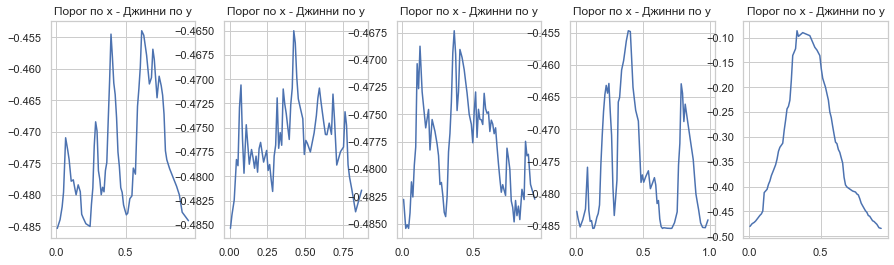

In [443]:
plt.figure(figsize=(15, 4))
i = 0
for el in criteria:
    thres, ginis, q, num = find_best_split(df[el], y)
    plt.subplot(1, 5, i + 1)
    plt.errorbar(thres, ginis)
    plt.title("Порог по x - Джинни по y")
    #plt.scatter(thres, ginis)
    i+=1

Scatter графики - значение признака - класс

In [219]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


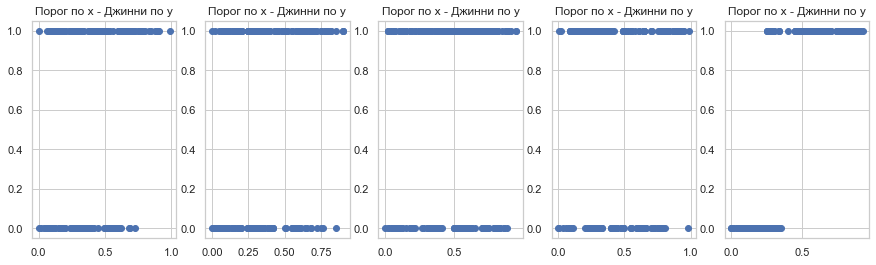

In [218]:
plt.figure(figsize=(15, 4))
i = 0
for el in criteria:
    #thres, ginis, q, num = find_best_split(df[el], y)
    plt.subplot(1, 5, i + 1)
    plt.scatter(df[el], y)
    plt.title("Порог по x - Джинни по y")
    #plt.scatter(thres, ginis)
    i+=1

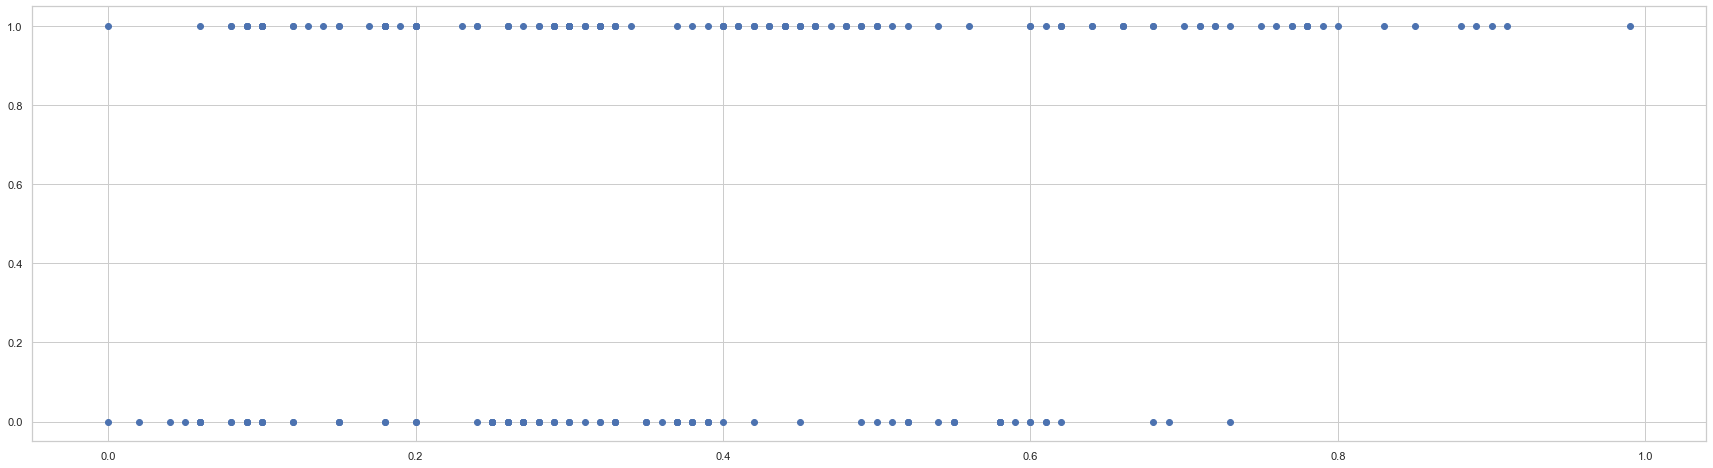

In [220]:
plt.figure(figsize=(30, 8))
plt.scatter(df['STG'], y)


Text(0.5, 1.0, 'Scatter график - значение порога/класс для признака PEG')

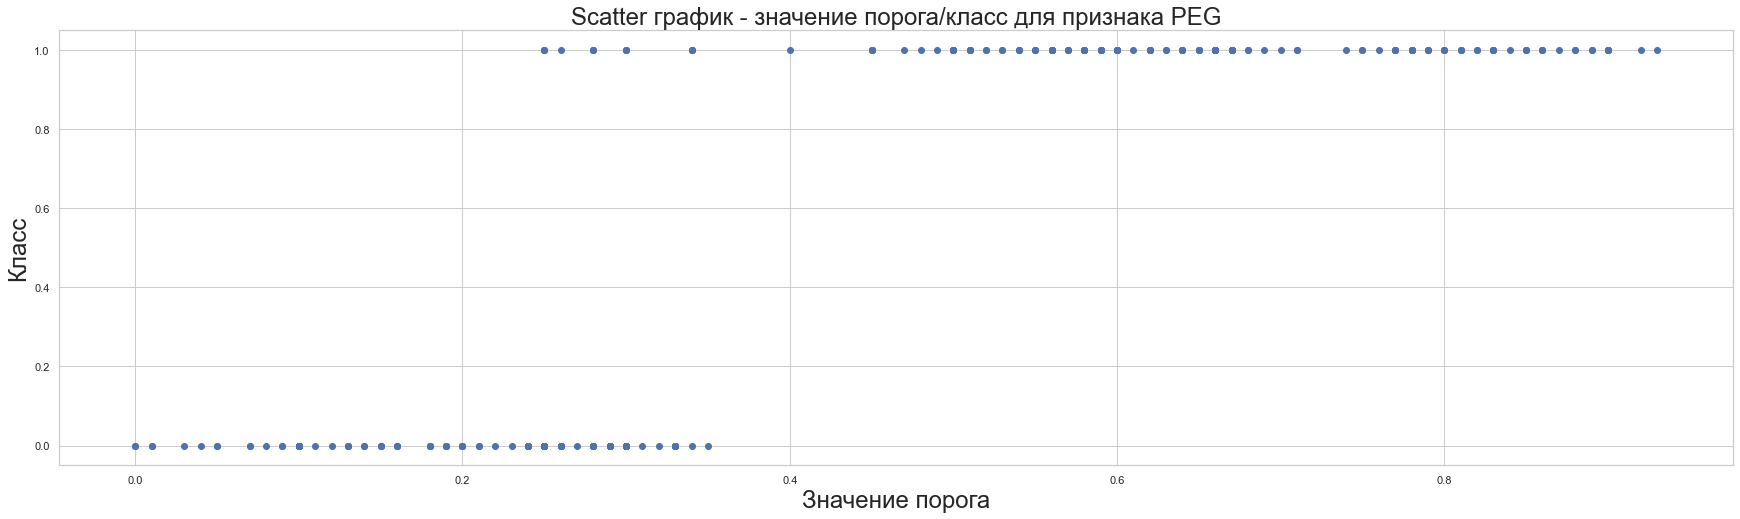

In [227]:
plt.figure(figsize=(30, 8))
plt.scatter(df['PEG'], y)
plt.xlabel("Значение порога", fontsize=24)
plt.ylabel('Класс', fontsize=24)
plt.title('Scatter график - значение порога/класс для признака PEG', fontsize=24)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Лучше всего разбивать на два поддерева признак PGE(Крайний график справа). Ибо для него практически идеально признаки отделены. ДЛя маленьких порогов-  один класс, для больших порогов - другой класс.
Вид кривой "хороших" прихнаков относительно критерия Джинни имеет вид нормального распределения.
Кривые для признаков, для которых разделение практически невозможно сильно колеблются и имеют много пиков.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

# Тут дебажу

In [736]:
%load_ext autoreload

%autoreload 2


from hw5code import *

In [733]:
from collections import Counter

class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        

    def _fit_node(self, sub_X, sub_y, node):
        if np.all(sub_y == sub_y[0]): # все относятся к одному классу
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in sub_X.dtypes.reset_index()['index']: #1 замена
            
            #feature_type = self._feature_types[feature] # смотрю на тип, который имеет данный признак
            feature_type = 'real'
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[feature] # 2 замена - обращение сразу к столбцу
                
            elif feature_type == "categorical": # если тип категориальный
                counts = Counter(sub_X[feature]) # считает сколько раз встретились значения из массива feature
                clicks = Counter(sub_X[sub_y == 1][feature]) # исправил - тут обращение к элепментам, которые имеют положительный класс
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count # доля положительного класса, поменять местами
        
                sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1]))) #тут значения по возрастанию их вероятности 
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories))))) #переобозначение этих чисел на 0, 1, 2

                #feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
                d = {}
                
                for key, el in ratio.items():
                    d[key] = categories_map[el]
                    
                feature_vector = [d.get(n, n) for n in data.name]
                
                
                    
            else:
                raise ValueError

            if len(feature_vector) == 3:
                continue

            _, _, threshold, gini = find_best_slit_1(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold # выдает элементы, которые меньше порога

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "Categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"]) # 3 ошибка - запускаюсь также от других челов в y

 

In [740]:
criteria = ['STG', 'SCG', 'STR','LPR','PEG']

In [718]:
df2 = df[criteria]

In [782]:
Dt = DecisionTree(['real', 'real', 'real', 'real','real'])
Dt._fit_node(df2, y, {})

{'type': 'nonterminal', 'feature_split': 'PEG', 'threshold': 0.335} PEG -0.0860656027491214 151
0       True
1      False
2       True
3       True
4       True
       ...  
253    False
254    False
255    False
256     True
257    False
Name: PEG, Length: 258, dtype: bool
{'type': 'nonterminal', 'feature_split': 'LPR', 'threshold': 0.79} LPR -0.10777547734069469 10
0       True
2       True
3       True
4      False
7       True
       ...  
243     True
244     True
247     True
252     True
256     True
Name: LPR, Length: 115, dtype: bool
{'type': 'nonterminal', 'feature_split': 'STG', 'threshold': 0.75} STG -0.07130494980962272 5
0      True
2      True
3      True
7      True
8      True
       ... 
243    True
244    True
247    True
252    True
256    True
Name: STG, Length: 108, dtype: bool
{'type': 'nonterminal', 'feature_split': 'SCG', 'threshold': 0.615} SCG -0.06651893245977453 4
0       True
2       True
3       True
7       True
8       True
       ...  
243    False
244

KeyError: 0

In [747]:
node = {}
node['type'] = 'nonterminal'
node['feature split'] = 5
node

{'type': 'nonterminal', 'feature split': 5}

In [707]:
thres = df['STG'] < 0.5

In [712]:
np.logical_not(thres)

66

In [708]:
df[thres]

,STG,SCG,STR,LPR,PEG,UNS,C
0,0.00,0.00,0.00,0.00,0.00,0,1
1,0.08,0.08,0.10,0.24,0.90,1,1
2,0.06,0.06,0.05,0.25,0.33,0,1
3,0.10,0.10,0.15,0.65,0.30,1,1
4,0.08,0.08,0.08,0.98,0.24,0,1
...,...,...,...,...,...,...,...
189,0.49,0.90,0.52,0.90,0.47,1,1
190,0.45,0.70,0.82,0.16,0.64,1,1
191,0.42,0.70,0.72,0.30,0.80,1,1
192,0.37,0.60,0.77,0.40,0.50,1,1


In [1136]:
data = pd.DataFrame({'name': ['Earth', 'Moon', 'Mars', 'Mars', 'Mars', 'Moon', 'Moon', 'Mars', "Moon", "Earth"], 'mass_to_earth': [1, 0, 0, 1, 1, 1, 1, 0, 0, 1], 'cata':['Tree', 'Lamp', 'Lamp', 'Tree', 'Polo', 'Reno', 'Reno', 'Polo', 'Tree', 'Tree'], "binary":[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})
data

,name,mass_to_earth,cata,binary
0,Earth,1,Tree,0
1,Moon,0,Lamp,1
2,Mars,0,Lamp,2
3,Mars,1,Tree,3
4,Mars,1,Polo,4
5,Moon,1,Reno,5
6,Moon,1,Reno,6
7,Mars,0,Polo,7
8,Moon,0,Tree,8
9,Earth,1,Tree,9


In [931]:
Counter(data['name'])

Counter({'Earth': 1, 'Moon': 2, 'Mars': 3})

In [1071]:
data1 = data.to_numpy()


In [930]:
Counter(data1[:, 0])

Counter({'Earth': 1, 'Moon': 2, 'Mars': 3})

In [917]:
Counter(data['mass_to_earth']).most_common(1)[0][0]

1

In [859]:
data[['name']]

,name
0,Earth
1,Moon
2,Mars
3,Mars
4,Mars
5,Moon


In [925]:
di = {}
Dt2 = DecisionTree(['categorical'])
Dt2._fit_node(data[['name']], data['mass_to_earth'], di)

In [926]:
di

{'type': 'terminal', 'class': [(1, 4)]}

In [814]:
el1= data['name'].values
el2 = data['mass_to_earth'].values
el1

array(['Earth', 'Moon', 'Mars', 'Mars', 'Mars', 'Moon'], dtype=object)

In [809]:
clicks = Counter(data[el2 == 1].name)

In [802]:
Counter(data[el2 == 1]['name'])

Counter({'Earth': 1, 'Mars': 1})

In [815]:
counts = Counter(data.name)
counts

Counter({'Earth': 1, 'Moon': 2, 'Mars': 3})

In [827]:
counts = Counter(data.name) # считает сколько раз встретились значения из массива feature
clicks = Counter(data[el2 == 1].name) # исправил - тут обращение к элементам, которые имеют положительный класс
ratio = {}
for key, current_count in counts.items():
    if key in clicks:
        current_click = clicks[key]
    else:
        current_click = 0
    ratio[key] = current_click / current_count # доля положительного класса
    
sorted_categories = list(map(lambda x: x[1], sorted(ratio.items(), key=lambda x: x[1])))
categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

In [825]:
sorted_categories

[0.5, 0.6666666666666666, 1.0]

In [826]:
list(range(len(sorted_categories)))

[0, 1, 2]

In [838]:
sorted_categories1 = list(map(lambda x: x[1], sorted(ratio.items(), key = lambda x:x[1])))
sorted_categories1

[0.5, 0.6666666666666666, 1.0]

In [836]:
ratio

{'Earth': 1.0, 'Moon': 0.5, 'Mars': 0.6666666666666666}

In [828]:
categories_map

{0.5: 0, 0.6666666666666666: 1, 1.0: 2}

In [846]:
for key, el in ratio.items():
    print(key, el)

Earth 1.0
Moon 0.5
Mars 0.6666666666666666


In [851]:
d = {}
for key, el in ratio.items():
    d[key] = categories_map[el]
d

{'Earth': 2, 'Moon': 0, 'Mars': 1}

In [864]:
vect = [d.get(n, n) for n in data.name]

In [865]:
_, _, threshold, gini = find_best_slit_1(vect, data['mass_to_earth'])

In [868]:
categories_map.items()

dict_items([(0.5, 0), (0.6666666666666666, 1), (1.0, 2)])

In [867]:
threshold

1.5

In [871]:
threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))

In [870]:
list(filter(lambda x: x[1] < threshold, categories_map.items()))

[(0.5, 0), (0.6666666666666666, 1)]

In [872]:
threshold_best

[0.5, 0.6666666666666666]

In [880]:
%reload_ext autoreload

%autoreload 3


from hw5code1 import *

In [940]:
el = data1[:, 1]


In [942]:
el[1]

0

In [1137]:
data2 = data[['name', 'cata', 'binary']]
data2 = data2.to_numpy()
data2

array([['Earth', 'Tree', 0],
       ['Moon', 'Lamp', 1],
       ['Mars', 'Lamp', 2],
       ['Mars', 'Tree', 3],
       ['Mars', 'Polo', 4],
       ['Moon', 'Reno', 5],
       ['Moon', 'Reno', 6],
       ['Mars', 'Polo', 7],
       ['Moon', 'Tree', 8],
       ['Earth', 'Tree', 9]], dtype=object)

In [1002]:
y2 = data['mass_to_earth'].to_numpy()
y2

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [1128]:
def _predict_node(x, node):
        
        if (node['type'] == 'terminal'):
            #print("Final", node['class'])
            return node['class']
        else:
            k = node['feature_split']
            try:
                l = node['categories_split']
                if x[k] in l:
                    print("Left")
                else:
                    print("right")
                
            except:
                l = node['threshold']
                
                if (x[k] <= l):
                #print("Here left", k)
                    return self._predict_node(x, node['left_child'])
                else:
                #print("Here right", k)
                    return self._predict_node(x, node['right_child'])

In [1126]:
data2[0]

array(['Earth', 'Tree'], dtype=object)

In [1129]:
_predict_node(data2[0], di)

right


In [1187]:
data2

array([['Earth', 'Tree', 0],
       ['Moon', 'Lamp', 1],
       ['Mars', 'Lamp', 2],
       ['Mars', 'Tree', 3],
       ['Mars', 'Polo', 4],
       ['Moon', 'Reno', 5],
       ['Moon', 'Reno', 6],
       ['Mars', 'Polo', 7],
       ['Moon', 'Tree', 8],
       ['Earth', 'Tree', 9]], dtype=object)

In [1209]:

Dt = DecisionTree1(['categorical', 'categorical', 'real'], 4)


In [1210]:
Dt.fit(data2, y2)

I am here [0 1 2] 0
I am here [0 1 1] 1
I am here [7 8 9] 2


In [1140]:
y_pred = Dt.predict(data2)

In [1211]:
Dt._tree

{'type': 'nonterminal',
 'feature_split': 1,
 'categories_split': ['Lamp'],
 'left_child': {'type': 'terminal', 'class': 0},
 'right_child': {'type': 'nonterminal',
  'feature_split': 2,
  'threshold': 6.5,
  'left_child': {'type': 'terminal', 'class': 1},
  'right_child': {'type': 'terminal', 'class': 0}}}

In [1315]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS,C
0,0.00,0.00,0.00,0.00,0.00,0,1
1,0.08,0.08,0.10,0.24,0.90,1,1
2,0.06,0.06,0.05,0.25,0.33,0,1
3,0.10,0.10,0.15,0.65,0.30,1,1
4,0.08,0.08,0.08,0.98,0.24,0,1


In [1318]:
y.shape

(258,)

In [1317]:
df3 = df2.to_numpy()
y =  df[' UNS'].to_numpy()

In [1432]:
di1 = {}
X_train, X_test, y_train, y_test = train_test_split(
df3, y, test_size=0.3, random_state=42)

Dt = DecisionTree1(['real', 'real', 'real', 'real','real'], 1, 5, 70)
Dt.fit(X_train, y_train)
y_pred = Dt.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9615384615384616


In [1411]:
Dt._tree

{'type': 'terminal', 'class': 1}

In [1395]:
yf = [1, 1, 0, 0, 1, 0, 0]

In [1396]:
Counter(yf).most_common(1)

[(0, 4)]

In [1389]:
class rf:
    def __init__(self, depth):
        self._depth = depth
        
    def funct(self, level):
        level += 1
        print(level)
        if (level < self._depth):
            funct(level)
        

In [1390]:
a = rf(10)

In [1391]:
a.funct(0)

1
2
3
4
5
6
7
8
9
10


In [1316]:
df2.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [1049]:
obg = df3[0]

In [1050]:
obg

array([0., 0., 0., 0., 0.])

In [1055]:
k = di1['feature_split']
if (obg[k] < di1['threshold']):
    print("Here")
else:
    print("right")

Here


In [1068]:
#прогноз для вещественного признака
def recur(di1, obg):
    if (di1['type'] == 'terminal'):
        print("Final", di1['class'])
        return di1['class']
    else:
        k = di1['feature_split']
        if (obg[k] < di1['threshold']):
            print("Here left", k)
            return recur(di1['left_child'], obg)
        else:
            print("Here right", k)
            return recur(di1['right_child'], obg)

In [1069]:
ans = recur(di1, obg)
ans

Here left 4
Here left 3
Here left 0
Here left 1
Here left 0
Here left 0
Here left 4
Final 0


0

In [1066]:
ans

In [1116]:
for el in di:
    print (el)

type
feature_split
categories_split
left_child
right_child


In [1121]:
try:
    k = di['feature_split']
    print(k)
except:
    print(di['type'])

1


In [1039]:
di1

{'type': 'nonterminal',
 'feature_split': 4,
 'threshold': 0.335,
 'left_child': {'type': 'nonterminal',
  'feature_split': 3,
  'threshold': 0.79,
  'left_child': {'type': 'nonterminal',
   'feature_split': 0,
   'threshold': 0.75,
   'left_child': {'type': 'nonterminal',
    'feature_split': 1,
    'threshold': 0.615,
    'left_child': {'type': 'nonterminal',
     'feature_split': 0,
     'threshold': 0.19,
     'left_child': {'type': 'nonterminal',
      'feature_split': 0,
      'threshold': 0.16499999999999998,
      'left_child': {'type': 'nonterminal',
       'feature_split': 4,
       'threshold': 0.295,
       'left_child': {'type': 'terminal', 'class': 0},
       'right_child': {'type': 'nonterminal',
        'feature_split': 3,
        'threshold': 0.53,
        'left_child': {'type': 'terminal', 'class': 0},
        'right_child': {'type': 'terminal', 'class': 1}}},
      'right_child': {'type': 'nonterminal',
       'feature_split': 2,
       'threshold': 0.464999999999999

In [1042]:
di1['right_child']

{'type': 'nonterminal',
 'feature_split': 4,
 'threshold': 0.375,
 'left_child': {'type': 'nonterminal',
  'feature_split': 3,
  'threshold': 0.51,
  'left_child': {'type': 'terminal', 'class': 0},
  'right_child': {'type': 'terminal', 'class': 1}},
 'right_child': {'type': 'terminal', 'class': 1}}

In [1036]:
di1['threshold']

0.335

In [968]:
el = data2[:,0]

In [969]:
d = {'Mars': 2, 'Earth': 1, 'Moon': 1}
d

{'Mars': 2, 'Earth': 1, 'Moon': 1}

In [970]:
list(map(lambda x: d[x], el))

[1, 1, 2, 2, 2, 1]

In [897]:
df2.head()

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.06,0.06,0.05,0.25,0.33
3,0.10,0.10,0.15,0.65,0.30
4,0.08,0.08,0.08,0.98,0.24


In [898]:
df3 = df2.to_numpy()

In [900]:
df3[:, 0]

array([0.  , 0.08, 0.06, 0.1 , 0.08, 0.09, 0.1 , 0.15, 0.2 , 0.  , 0.18,
       0.06, 0.1 , 0.1 , 0.2 , 0.12, 0.05, 0.1 , 0.15, 0.2 , 0.12, 0.18,
       0.1 , 0.18, 0.06, 0.09, 0.04, 0.09, 0.08, 0.15, 0.12, 0.15, 0.1 ,
       0.18, 0.2 , 0.06, 0.1 , 0.18, 0.09, 0.19, 0.02, 0.2 , 0.14, 0.18,
       0.12, 0.17, 0.1 , 0.13, 0.18, 0.09, 0.06, 0.23, 0.09, 0.24, 0.18,
       0.1 , 0.2 , 0.09, 0.18, 0.08, 0.09, 0.06, 0.15, 0.2 , 0.24, 0.25,
       0.32, 0.29, 0.28, 0.3 , 0.27, 0.31, 0.29, 0.3 , 0.28, 0.26, 0.27,
       0.28, 0.25, 0.3 , 0.32, 0.3 , 0.32, 0.25, 0.27, 0.25, 0.33, 0.27,
       0.29, 0.29, 0.26, 0.32, 0.25, 0.29, 0.32, 0.26, 0.3 , 0.26, 0.29,
       0.24, 0.27, 0.3 , 0.3 , 0.25, 0.3 , 0.29, 0.26, 0.31, 0.32, 0.3 ,
       0.28, 0.26, 0.32, 0.33, 0.3 , 0.29, 0.27, 0.32, 0.28, 0.33, 0.28,
       0.26, 0.31, 0.3 , 0.33, 0.31, 0.3 , 0.27, 0.26, 0.3 , 0.39, 0.4 ,
       0.45, 0.48, 0.4 , 0.41, 0.38, 0.37, 0.41, 0.38, 0.33, 0.42, 0.44,
       0.39, 0.42, 0.46, 0.37, 0.33, 0.35, 0.48, 0.

# Дебаг закончил

In [1143]:
data = pd.read_csv("agaricus-lepiota.data") 
data.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [1144]:
data.shape

(8123, 23)

In [1151]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])
data

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [1154]:
target = data['p']
del data['p']
data1 = data.to_numpy()
target1 = target.to_numpy()

In [1157]:
data1 = data.to_numpy()
target1 = target.to_numpy()

In [1158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data1, target1, test_size=0.5, random_state=777)

In [1162]:
types = ['categorical']*22

Dt = DecisionTree1(types)
Dt.fit(X_train, y_train)

In [1165]:
y_pred = Dt.predict(X_test)

In [1166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9980305268340719

Качество близко к единице. 

In [1169]:
Dt._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [0, 3, 5],
 'left_child': {'type': 'nonterminal',
  'feature_split': 19,
  'categories_split': [3, 2, 8, 6, 0, 1, 4, 7],
  'left_child': {'type': 'nonterminal',
   'feature_split': 14,
   'categories_split': [3, 2, 6, 5, 7, 4],
   'left_child': {'type': 'nonterminal',
    'feature_split': 0,
    'categories_split': [4, 5, 2, 0, 3],
    'left_child': {'type': 'nonterminal',
     'feature_split': 1,
     'categories_split': [2, 0, 3],
     'left_child': {'type': 'nonterminal',
      'feature_split': 14,
      'categories_split': [3, 2, 6, 5, 7],
      'left_child': {'type': 'nonterminal',
       'feature_split': 21,
       'categories_split': [0, 1, 6, 5, 3, 4],
       'left_child': {'type': 'terminal', 'class': 0},
       'right_child': {'type': 'nonterminal',
        'feature_split': 1,
        'categories_split': [2],
        'left_child': {'type': 'terminal', 'class': 0},
        'right_child': {'type': 'terminal', 'cl

Как видно не много вершин. Дерево не глубокое.

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

# Поддержка min_samples_leaf

In [1362]:
data_tic.shape

(957, 9)

In [1374]:
leaf = np.arange(200)+1
# возьму train/test - 50/50
X_train, X_test, y_train, y_test = train_test_split(
    data_tic, target_tic, test_size=0.5, random_state=777)

In [1375]:
types = ['real']*X_train.shape[1]
accur = []
for el in leaf:
    Dt = DecisionTree1(types, el)
    Dt.fit(X_train, y_train)
    y_pred = Dt.predict(X_test)
    accur.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'accuracy score on test')

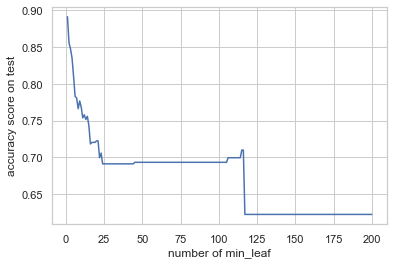

In [1376]:
line_mom, = plt.plot(leaf,accur)
plt.xlabel("number of min_leaf")
plt.ylabel("accuracy score on test")

Как видно качество падает до того времени пока 23 листа. Дальше качество стабилизируется - как понял далее признаки хорошо разделяются - имеют довольно неплохое среднее значение. Далее около 120 листа качество снова падает. 

# Поддержка max_depth

In [1421]:
depth = np.arange(20)+1
X_train, X_test, y_train, y_test = train_test_split(
    data_tic, target_tic, test_size=0.5, random_state=777)

In [1422]:
types = ['real']*X_train.shape[1]
accur_depth = []
for el in depth:
    Dt = DecisionTree1(types,1, el)
    Dt.fit(X_train, y_train)
    y_pred = Dt.predict(X_test)
    accur_depth.append(accuracy_score(y_test, y_pred))

In [1423]:
accur_depth

[0.6221294363256785,
 0.6931106471816284,
 0.6910229645093946,
 0.7118997912317327,
 0.7369519832985386,
 0.7766179540709812,
 0.8183716075156576,
 0.8893528183716075,
 0.8935281837160751,
 0.8872651356993737,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413,
 0.8914405010438413]

Text(0, 0.5, 'accuracy score on test')

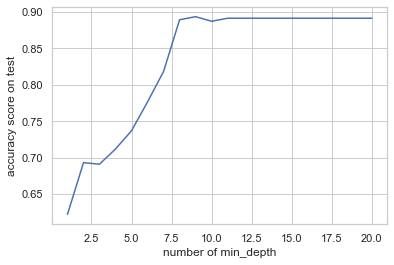

In [1424]:
line_mom, = plt.plot(depth,accur_depth)
plt.xlabel("number of min_depth")
plt.ylabel("accuracy score on test")

Как видно из графика - чем больше глубина, тем лучше качество. Дерево просто начинает переобучаться. Далее качество не улучшается, так как с глубиной 9 дерево полностью обучилось под выборку и на тесте будет повторять паттерн трейна.

# Поддержка min_samples_split

In [1433]:
split = np.arange(200)+1
X_train, X_test, y_train, y_test = train_test_split(
    data_tic, target_tic, test_size=0.5, random_state=777)

In [1434]:
types = ['real']*X_train.shape[1]
accur_split = []
for el in split:
    Dt = DecisionTree1(types,1, 10, el)
    Dt.fit(X_train, y_train)
    y_pred = Dt.predict(X_test)
    accur_split.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'accuracy score on test')

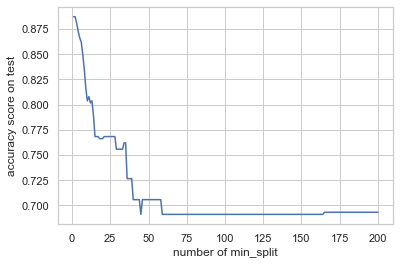

In [1436]:
line_mom, = plt.plot(split,accur_split)
plt.xlabel("number of min_split")
plt.ylabel("accuracy score on test")

Как видно чем больше сплит, в таком случае не можем рассматривать разбиения меньше чем сплит. Интуитивно понятный график. В коде за это отвечает кусок кода:
 if (len(feature_vector) <  self._min_samples_split):
        continue

In [ ]:
#Итоговый код для класса с поддержкой:
import numpy as np
from collections import Counter



def find_best_split(feature_vector, target_vector , min_leaf):
    
    objects = np.array(list(zip(feature_vector, target_vector)))
    
    objects = objects[objects[:, 0].argsort()] # отсорченный массив двух пар по значениям признака
    features = objects[:, 0]
    values = objects[:, 1]
    
    
    N = len(features)
    total = sum(values)
    left = np.append(np.zeros(1), features)

    right = np.append(features, np.zeros(1))
    thresholds = ((left+right)/2)[1:-1]
    
    one_counts = np.cumsum(values[:-1])
    l_lens = np.cumsum(np.ones(N-1))
    r_lens = N - l_lens
    left_p1 = one_counts/l_lens
    right_p1 = (total - one_counts)/r_lens
    
    gini = - ((1 - left_p1 ** 2 - (1-left_p1)**2) * l_lens + (1 - right_p1 ** 2 - (1-right_p1) ** 2) * r_lens)/N
    
    condition = (left < right)[1:-1]
    #print(left, right, N)
    condition_leaf = np.array([False]*(min_leaf-1)+[True]*(N+1-2*min_leaf)+[False]*(min_leaf-1)) #тут условие - что отступаем от края на min_leaf-1,  иначе будет разбиение с количеством листьев < min_leaf
    #print(condition_leaf)
    #print(condition)
    if (N+1-2*min_leaf < 0): # чтобы не было ухода в отрицательные числа
        return (), (), -1, -1
    thresholds = thresholds[condition & condition_leaf]
    gini = gini[condition & condition_leaf]
    #print(gini, len(gini))
    #print(thresholds)
    if (len(gini) == 0):
        return (), (), -1, -1
    
    maxi = np.argmax(gini)
    
    return thresholds, gini, thresholds[maxi], gini[maxi]

class DecisionTree1:
    def __init__(self, feature_types, min_samples_leaf, max_depth, min_samples_split):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf



    def _fit_node(self, sub_X, sub_y, node, level):
        #print(sub_y)
        # тут веротяно понадобится каст к другой размерности
        level += 1
        if (level == self._max_depth+1):
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        
        if np.all(sub_y == sub_y[0]): #исправление чтобы все были одного класса. Критерий останова
            #print("i Am here", sub_y)
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        feature_best, threshold_best, gini_best, split = None, None, None, None

        for feature in range(0, sub_X.shape[1]): #от нуля смотрю 
            #print(feature)
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":

                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]

                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count #замена местами чтобы получилась вероятность 
                    
                    
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1]))) #здесь замена на x[0]
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))
                #print(ratio, "ratio")
                #print(categories_map, "categ_map")
                #print(sorted_categories, "sorted_cat")
                
                
                '''d = {}
                for key, el in ratio.items():
                    d[key] = categories_map[el] или потом можно было такое преобразование сделать беря в sorted_cat: lambda x:x[1]
                print(d, "d")'''
                
                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature]))) # к каждому элементу последовательности ставит соотвествие -> все соответствия собраны в d[x]
                #print(feature_vector)
                
            else:
                raise ValueError

            if len(np.unique(feature_vector)) == 1: 
                continue
               
            if (len(feature_vector) <  self._min_samples_split): # если у вектора длина меньше min_samples_split, то не идем дальше
             
                continue
            

            _, _, threshold, gini = find_best_split(feature_vector, sub_y, self._min_samples_leaf)
            if gini_best is None or gini > gini_best:
              
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold
                if (gini == -1):
                    feature_best = None
                    
                #print(gini)
              
                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical": 
                    #print(threshold, "threshold")
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))# беру x[0] для x[1]cond
                    #print(threshold_best, "threshold best")
                    #print(categories_map.items(), "categ")
                    
                else:
                    raise ValueError

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0] # конретно говорю какой класс
            
            #print("i Am here", feature, node['class'])
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
            #print(threshold_best, gini, feature_vector)
        else:
            raise ValueError
        node["left_child"], node["right_child"] = {}, {}
        #print(split, "split")
        #print(sub_X[split], "sub_X[split]")
        #print(sub_y[split], "sub_y[split]")
        #print(split)
        self._fit_node(sub_X[split], sub_y[split], node["left_child"], level)

        
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"], level ) # испрвление лог нот
    

    def _predict_node(self, x, node):
        
        if (node['type'] == 'terminal'):
            #print("Final", node['class'])
            return node['class']
        else:
            k = node['feature_split']
            try:
                l = node['categories_split']
                if x[k] in l:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])
                    
                
            except:
                l = node['threshold']
                
                if (x[k] <= l):
                #print("Here left", k)
                    return self._predict_node(x, node['left_child'])
                else:
                #print("Here right", k)
                    return self._predict_node(x, node['right_child'])
        
        
        
        pass

    def fit(self, X, y):
        self._fit_node(X, y, self._tree, 0)

    def predict(self, X):
        predicted = []
        for x in X: # прохожусь для каждого объекта в выборке, чтобы сделать предсказание
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

Dataset mushrooms Для категориальных. Для mushrooms сделаю код отдельно - для остальных сгруппирую.

In [1226]:
# Буду использовать StratifiedKFold он не требует get_params и возрашает индексы для дальнейшей cv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer
from sklearn.model_selection import StratifiedKFold
types = ['categorical']*22
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
mass = []
mean_score = 0
for train_index, test_index in skf.split(data1, target1):
    X_train, X_test = data1[train_index], data1[test_index]
    y_train, y_test = target1[train_index], target1[test_index]
    Dt = DecisionTree1(types)
    Dt.fit(X_train, y_train)
    ypred = Dt.predict(X_test)
    mean_score += accuracy_score(y_test, ypred)

print(mean_score/10)




1.0


Он же для вещественных

In [1227]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer
from sklearn.model_selection import StratifiedKFold
types = ['real']*22
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
mass = []
mean_score = 0
for train_index, test_index in skf.split(data1, target1):
    X_train, X_test = data1[train_index], data1[test_index]
    y_train, y_test = target1[train_index], target1[test_index]
    Dt = DecisionTree1(types)
    Dt.fit(X_train, y_train)
    ypred = Dt.predict(X_test)
    mean_score += accuracy_score(y_test, ypred)

print(mean_score/10)



1.0


Ван хот для всех признаков

In [1290]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse = "False")
data3 = enc.fit_transform(data1).toarray()
data3.shape

(8123, 117)

In [1291]:
types = ['real']*data3.shape[1]
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
mean_score = 0
for train_index, test_index in skf.split(data3, target1):
    X_train, X_test = data3[train_index], data3[test_index]
    y_train, y_test = target1[train_index], target1[test_index]
    Dt = DecisionTree1(types)
    Dt.fit(X_train, y_train)
    ypred = Dt.predict(X_test)
    l = accuracy_score(y_test, ypred)
    mean_score += l
    print(l)
print("mean_score", mean_score/10)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
mean_score 1.0


Sklearn библиотека

In [1288]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
mean_score = 0
for train_index, test_index in skf.split(data1, target1):
    X_train, X_test = data1[train_index], data1[test_index]
    y_train, y_test = target1[train_index], target1[test_index]
    clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    l = accuracy_score(y_test, ypred)
    mean_score += l
    print(l)
print("mean_score", mean_score/10)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
mean_score 1.0


Сделаю сразу для всех


In [1272]:
data_tic = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data',
)
data_car = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
)  
data_nursery = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data",
)  

In [1273]:
# Сделал предобработку данных для классов - чтобы были 0/1

data_car['unacc'] = data_car['unacc'].apply(lambda x: 1 if (x =='good' or x == 'vgood')else 0)
data_nursery['recommend'] = data_nursery['recommend'].apply(lambda x: 1 if (x =='not_recom' or x == 'recommend')else 0)
data_tic['positive'] = data_tic['positive'].apply(lambda x: 1 if x =='positive' else 0)

target_car = data_car['unacc']
target_nursery = data_nursery['recommend']
target_tic = data_tic['positive']
del data_car['unacc']
del data_nursery['recommend']
del data_tic['positive']

le = LabelEncoder()
for col in data_tic.columns:
    data_tic[col] = le.fit_transform(data_tic[col])
for col in data_car.columns:   
    data_car[col] = le.fit_transform(data_car[col])
    
for col in data_nursery.columns:     
    data_nursery[col] = le.fit_transform(data_nursery[col])
    
data_tic = data_tic.to_numpy()
target_tic = target_tic.to_numpy()

data_car = data_car.to_numpy()
target_car = target_car.to_numpy()

data_nursery = data_nursery.to_numpy()
target_nursery = target_nursery.to_numpy()

In [1308]:
data_all = [(data_tic,target_tic) , (data_car, target_car), (data_nursery, target_nursery)]
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
for el in data_all:
    
    types = ['categorical']*el[0].shape[1]
    mean_score = 0
    
    for train_index, test_index in skf.split(el[0], el[1]):
        
        X_train, X_test = el[0][train_index], el[0][test_index]
        y_train, y_test = el[1][train_index], el[1][test_index]
        Dt = DecisionTree1(types)
        Dt.fit(X_train, y_train)
        ypred = Dt.predict(X_test)
       
        
        l = accuracy_score(y_test, ypred)
        
        mean_score += l
        print(el[0].shape, l)

    print(el[0].shape, mean_score/10, "Mean_score - который пойдет в табличку для категориальных")

(957, 9) 0.9375
(957, 9) 0.9270833333333334
(957, 9) 0.9375
(957, 9) 0.9583333333333334
(957, 9) 0.96875
(957, 9) 0.9166666666666666
(957, 9) 0.9479166666666666
(957, 9) 1.0
(957, 9) 0.9473684210526315
(957, 9) 0.9368421052631579
(957, 9) 0.9477960526315791 Mean_score - который пойдет в табличку для категориальных
(1727, 6) 1.0
(1727, 6) 1.0
(1727, 6) 1.0
(1727, 6) 0.9942196531791907
(1727, 6) 0.9884393063583815
(1727, 6) 0.9826589595375722
(1727, 6) 0.9884393063583815
(1727, 6) 0.9941860465116279
(1727, 6) 1.0
(1727, 6) 0.9941860465116279
(1727, 6) 0.9942129318456783 Mean_score - который пойдет в табличку для категориальных
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 0.9992283950617284
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 1.0
(12959, 8) 0.9997685185185186 Mean_score - который пойдет в табличку для категориальных


Для вещественных

In [1298]:
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
clf = DecisionTreeClassifier()
for el in data_all:
    
    types = ['real']*el[0].shape[1]
    mean_score = 0
    Dt = DecisionTree1(types)
    
    for train_index, test_index in skf.split(el[0], el[1]):
        
        X_train, X_test = el[0][train_index], el[0][test_index]
        y_train, y_test = el[1][train_index], el[1][test_index]
        Dt.fit(X_train, y_train)
        ypred = Dt.predict(X_test)
        l = accuracy_score(y_test, ypred)
        mean_score += l
        print(el[0].shape, l)

    print(el[0].shape, mean_score/10, "Mean_score - который пойдет в табличку для вещественных")

(957, 9) 0.78125
(957, 9) 0.9375
(957, 9) 0.8958333333333334
(957, 9) 0.8229166666666666
(957, 9) 0.9270833333333334
(957, 9) 0.8854166666666666
(957, 9) 0.9166666666666666
(957, 9) 0.8736842105263158
(957, 9) 0.8631578947368421
(957, 9) 0.8631578947368421
(957, 9) 0.8766666666666667 Mean_score - который пойдет в табличку для вещественных
(1727, 6) 1.0
(1727, 6) 1.0
(1727, 6) 1.0
(1727, 6) 0.9942196531791907
(1727, 6) 0.9884393063583815
(1727, 6) 0.9942196531791907
(1727, 6) 0.9884393063583815
(1727, 6) 0.9941860465116279
(1727, 6) 1.0
(1727, 6) 0.9941860465116279
(1727, 6) 0.9953690012098401 Mean_score - который пойдет в табличку для вещественных
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 0.9992283950617284
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 0.9992277992277993
(12959, 8) 0.9996912984412984 Mean_score - который пойдет в табличку для вещественных


Sklearn Classifier

In [1299]:
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
for el in data_all:

    mean_score = 0
    
    for train_index, test_index in skf.split(el[0], el[1]):
        
        X_train, X_test = el[0][train_index], el[0][test_index]
        y_train, y_test = el[1][train_index], el[1][test_index]
        clf.fit(X_train, y_train)
        ypred = clf.predict(X_test)
        l = accuracy_score(y_test, ypred)
        mean_score += l
        print(el[0].shape, l)

    print(el[0].shape, mean_score/10, "Mean_score - который пойдет в табличку для sklearn")

(957, 9) 0.8020833333333334
(957, 9) 0.9166666666666666
(957, 9) 0.84375
(957, 9) 0.8020833333333334
(957, 9) 0.9166666666666666
(957, 9) 0.875
(957, 9) 0.9166666666666666
(957, 9) 0.8421052631578947
(957, 9) 0.8315789473684211
(957, 9) 0.8631578947368421
(957, 9) 0.8609758771929826 Mean_score - который пойдет в табличку для sklearn
(1727, 6) 1.0
(1727, 6) 1.0
(1727, 6) 1.0
(1727, 6) 0.9942196531791907
(1727, 6) 0.9884393063583815
(1727, 6) 0.9942196531791907
(1727, 6) 0.9884393063583815
(1727, 6) 0.9941860465116279
(1727, 6) 1.0
(1727, 6) 0.9941860465116279
(1727, 6) 0.9953690012098401 Mean_score - который пойдет в табличку для sklearn
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 0.9992283950617284
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 0.9992277992277993
(12959, 8) 0.9996912984412984 Mean_score - который пойдет в табличку для sklearn


Ван хот

In [ ]:
data3 = enc.fit_transform(data1).toarray()

In [1300]:
enc = OneHotEncoder(handle_unknown='ignore', sparse = "False")
skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=500 )
for el in data_all:
    data_cur = enc.fit_transform(el[0]).toarray()
    
    types = ['real']*data_cur.shape[1]
    mean_score = 0
    Dt = DecisionTree1(types)
    
    for train_index, test_index in skf.split(data_cur, el[1]):
        
        X_train, X_test = data_cur[train_index], data_cur[test_index]
        y_train, y_test = el[1][train_index], el[1][test_index]
        Dt.fit(X_train, y_train)
        ypred = Dt.predict(X_test)
        l = accuracy_score(y_test, ypred)
        mean_score += l
        print(el[0].shape, l)

    print(el[0].shape, mean_score/10, "Mean_score - который пойдет в табличку для ван_хот вещественных")

(957, 9) 0.9375
(957, 9) 0.9270833333333334
(957, 9) 0.9270833333333334
(957, 9) 0.9583333333333334
(957, 9) 0.96875
(957, 9) 0.9166666666666666
(957, 9) 0.9479166666666666
(957, 9) 1.0
(957, 9) 0.9368421052631579
(957, 9) 0.9368421052631579
(957, 9) 0.9457017543859652 Mean_score - который пойдет в табличку для ван_хот вещественных
(1727, 6) 0.9942196531791907
(1727, 6) 0.9942196531791907
(1727, 6) 1.0
(1727, 6) 0.976878612716763
(1727, 6) 0.9710982658959537
(1727, 6) 0.976878612716763
(1727, 6) 0.9826589595375722
(1727, 6) 0.9883720930232558
(1727, 6) 1.0
(1727, 6) 0.9941860465116279
(1727, 6) 0.9878511896760317 Mean_score - который пойдет в табличку для ван_хот вещественных
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 0.9992283950617284
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 1.0
(12959, 8) 0.9992283950617284
(12959, 8) 1.0
(12959, 8) 0.9997685185185186 Mean_score - который пойдет в табличку для ван_хот вещественных


In [1303]:
final = pd.DataFrame({'Real': [1, 0.87666, 0.99536, 0.99969],
                   'Categorical': [1, 0.94779, 0.99421, 0.99976],
                   'One_Hot_real': [1, 0.94570, 0.98785, 0.99976], 
                    'Sklearn_Tree_Class': [1, 0.86097, 0.99536, 0.99969] },
                  index=['Mushrooms', 'Tic_Tac_Toe', 'Cars', 'Nursery'])

In [1304]:
final

,Real,Categorical,One_Hot_real,Sklearn_Tree_Class
Mushrooms,1.00000,1.00000,1.00000,1.00000
Tic_Tac_Toe,0.87666,0.94779,0.94570,0.86097
Cars,0.99536,0.99421,0.98785,0.99536
Nursery,0.99969,0.99976,0.99976,0.99969


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Как видно из таблички для различных наборов данных алгоритмы ранжируются по разному. Лучший датасет машрумс так как подвыборки хорошо разделяются и поэтому дерево хорошо описывает данные.
У набора Tic-tac-toe, где качество самое плохое меньше всего вариация признаков - в каждом из признаков по 3 значения. Дерево хорошо обучается - дает accuracy=1, но на тесте немного другая выборка и просадка в качестве.
Для остальных же датасетов ситуация лучше - но дерево просто переобучается. Лучше ставить ограничение по глубине дерева.

Как по мне компонента случайности в данных сравнениях - это исследование модели на вещественных признаках, хотя они вообще говоря категориальные. ОТсюда такая прибавка в качестве для набора tic_tac, когда перешли к категориальным. 

Для остальных же моментов нет особой нужды говорить о случайности, ибо accuracy везде зашкаливает к 1.

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

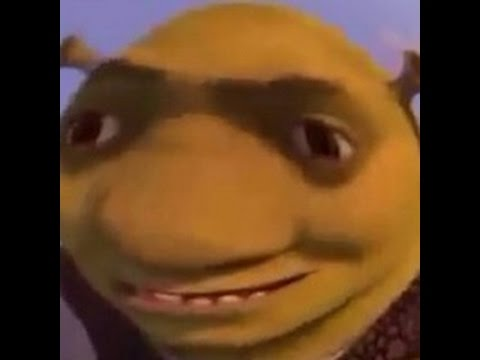

In [1439]:
from IPython.display import Image
Image(filename='image_trees.jpg',width=800, height=400)